# Tehnica Greedy

## Obiective
- Formularea problemelor ca probleme de căutare şi identificarea modalităţilor de rezolvare a lor. 
- Specificarea, proiectarea şi implementarea metodelor de căutare euristice.

## Cuvinte cheie
- cautare
- euristica
- best solution

## Aspecte teoretice

Informații privind metoda Greedy propusa de Newman - Newman, M. E. (2004). Fast algorithm for detecting community structure in networks. Physical review E, 69(6), 066133. [link](https://arxiv.org/pdf/cond-mat/0309508.pdf)

## Exemple

### Demo1

#### Problema identificării comunităților într-o rețea complexă

Descoperirea și analiza comunităților în rețele este o temă larg dezbătută în sociologie, biologie și informatică. Rețelele complexe reprezintă suportul pentru diferite sisteme reale (facebook, sistemul imun, creierul, infrastrcutura de transport, etc.). O comunitate în aceste rețele este definită ca un grup de noduri dens conectate unele cu altele, dar puțin conectate cu noduri din alte comunități. 

**Metodologie de rezolvare**
- citire date retea si vizualizarea retea
- identificare comunitati si vuzualizarea lor


In [102]:
# prerequisites
import os 
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 
import warnings 

from networkx.algorithms import community

warnings.simplefilter('ignore')


#### Pasul 1 - citire date si vizualizare

In [103]:
# read the network details
def readNet(fileName):
    f = open(fileName, "r")
    net = {}
    n = int(f.readline())
    net['noNodes'] = n
    mat = []
    for i in range(n):
        mat.append([])
        line = f.readline()
        elems = line.split(" ")
        for j in range(n):
            mat[-1].append(int(elems[j]))
    net["mat"] = mat 
    degrees = []
    noEdges = 0
    for i in range(n):
        d = 0
        for j in range(n):
            if (mat[i][j] == 1):
                d += 1
            if (j > i):
                noEdges += mat[i][j]
        degrees.append(d)
    net["noEdges"] = noEdges
    net["degrees"] = degrees
    f.close()
    return net


In [104]:
# plot a network 
def plotNetwork(network, communities = [1, 1, 1, 1, 1, 1]):
    np.random.seed(123) #to freeze the graph's view (networks uses a random view)
    A=np.matrix(network["mat"])
    G=nx.from_numpy_matrix(A)
    pos = nx.spring_layout(G)  # compute graph layout
    plt.figure(figsize=(4, 4))  # image is 8 x 8 inches 
    nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color = communities)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)


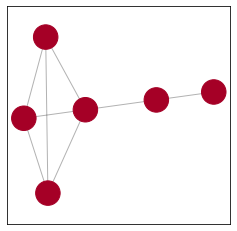

In [105]:
# load a network
crtDir =  os.getcwd()
filePath = os.path.join(crtDir,  'data', 'net.in')
network = readNet(filePath)

#plot the network
plotNetwork(network)

#### Pasul 2 - identificare comunitati si vizualizare

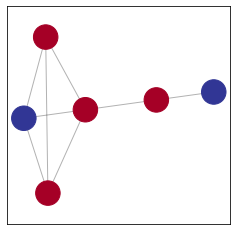

In [106]:
# plot a particular (mock) division in communities
mockCommunities = [1,2,1,2,1, 1]
plotNetwork(network, mockCommunities)

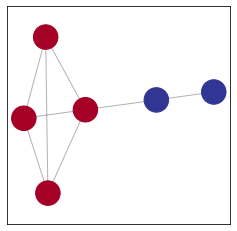

In [109]:
# identify the communities (by a tool) and plot them

def greedyCommunitiesDetectionByTool(network):
    # Input: a graph
    # Output: list of comunity index (for every node)

    from networkx.algorithms import community

    A=np.matrix(network["mat"])
    G=nx.from_numpy_matrix(A)
    communities_generator = community.girvan_newman(G)
    top_level_communities = next(communities_generator)
    sorted(map(sorted, top_level_communities))
    communities = [0 for node in range(network['noNodes'])]
    index = 1
    for community in sorted(map(sorted, top_level_communities)):
        for node in community:
            communities[node] = index
        index += 1
    return communities

plotNetwork(network, greedyCommunitiesDetectionByTool(network))


## Tema


Se cere identificarea comunităților existente într-o rețea folosind un algoritm Greedy. Se vor folosi:
- informații privind metoda Greedy propusa de Newman - Newman, M. E. (2004). Fast algorithm for detecting community structure in networks. Physical review E, 69(6), 066133. [link](https://arxiv.org/pdf/cond-mat/0309508.pdf)
- reteaua sociala dezvoltata semestrul trecut la MAP (cu construirea in prealabil a grafului corespunzator ei)
- cele 4 rețele / seturi de date din folderul asociat laboratorului current (in format GML – more details [here](https://www.fim.uni-passau.de/fileadmin/dokumente/fakultaeten/fim/lehrstuhl/rutter/abschlussarbeiten/ba-goetz.pdf))
-	rețele / seturi de date identificate de student 

Aplicaţia (specificata, proiectata si implementata) trebuie să permită:
-	Încărcarea datelor problemei 
-	Alegerea şi parametrizarea metodei de rezolvare a problemei
-	Afişarea soluţiei identificate
-	Precizarea performanţelor metodei de rezolvare alese

Aplicația trebuie să respecte specificațiile privind datele de intrare și datele de ieșire.

Aplicația va fi testată folosind date de difcultăți diferite (fiecare test validat având asociat un anumit punctaj).

Datele de intrare sunt reprezentate de:
-	graful retelei
-	parametrii algoritmului

Datele de iesire sunt reprezentate de:
-	numarul de comunitati identificate in graf
-	apartenenta la o anumita comunitate pentru fiecare nod al grafului/retelei


In [ ]:
# identify the communities (by your own code) and plot them

def greedyCommunitiesDetection(network):
    # Input: a graph
    # Output: list of comunity index (for every node)

    # TODOS
    pass

plotNetwork(network, greedyCommunitiesDetection(network))